In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\swaru\Downloads\python_test_dataset_flights_6months.csv')

In [4]:
df.shape

(32240, 19)

In [3]:
df.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,2024-03-01,PayPal,Yes,369.648995,Web,confirmed,04-03-2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,2024-03-01,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,2024-03-01,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,2024-03-01,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,2024-03-01,Debit Card,Yes,727.341978,Web,confirmed,11-09-2023,0.000000,0.000000,No


In [15]:
# Summary statistics
df.describe()

,buyer_id,supplier_id,pax,costprice,markup,selling_price,booking_date,refund_amount,travel_date,cashback,coupon_redeem
count,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240,32240.000000,32240,32240.000000,32240.000000
mean,249.198728,4.132351,2.995440,534.454208,214.911897,749.185111,2024-05-27 19:59:07.295284992,321.169098,2024-01-07 08:15:28.138957568,1.800790,7.230413
min,1.000000,1.000000,1.000000,50.005653,-51.478750,50.766206,2024-03-01 00:00:00,0.000000,2023-01-01 00:00:00,0.000000,-5.147875
25%,123.000000,2.000000,2.000000,292.391617,78.381381,399.945463,2024-04-11 00:00:00,0.000000,2023-07-20 00:00:00,0.000000,0.000000
50%,248.000000,4.000000,3.000000,533.950333,171.356857,729.318731,2024-05-26 00:00:00,221.482908,2024-01-05 00:00:00,0.000000,0.000000
75%,374.000000,6.000000,4.000000,773.706987,305.323878,1062.007949,2024-07-13 00:00:00,593.005610,2024-07-18 00:00:00,0.000000,8.969851
max,499.000000,7.000000,5.000000,1150.283064,1197.747825,2126.801346,2024-08-31 00:00:00,1462.725105,2024-12-31 00:00:00,21.268013,91.593305
std,144.847428,1.987509,1.414173,280.406808,176.536047,414.305052,NaN,339.865111,NaN,3.790310,13.746741


In [14]:
# Convert booking_date  to datetime
df['booking_date'] = pd.to_datetime(df['booking_date'])


In [21]:
### Observation 1: Top-performing suppliers and buyers ###
# Group by suppliers and buyers
supplier_performance = df.groupby('supplier_id').size().reset_index(name='bookings').sort_values(by='bookings', ascending=False)
buyer_performance = df.groupby('buyer_id').size().reset_index(name='bookings').sort_values(by='bookings', ascending=False)


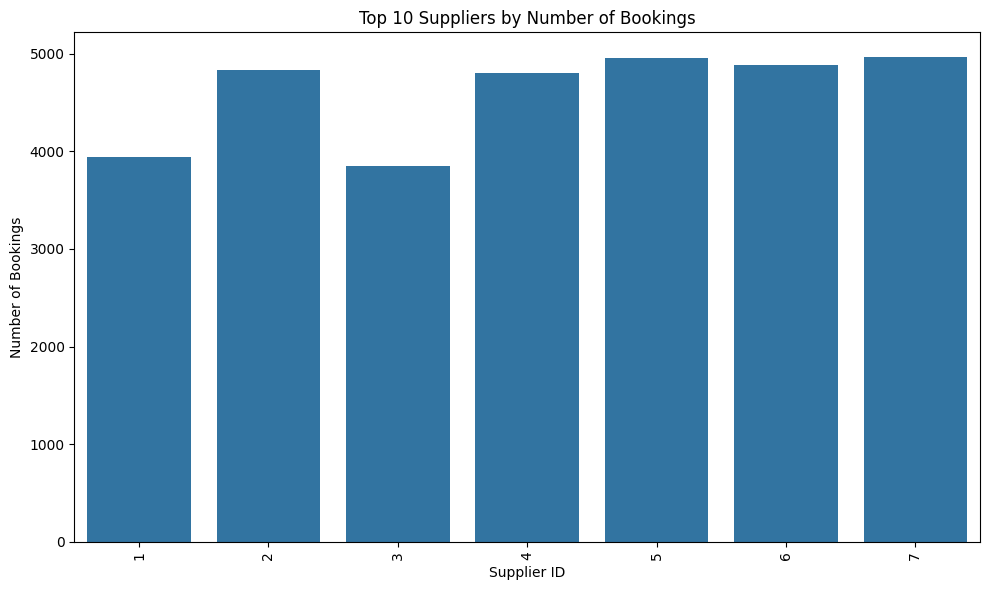

In [22]:

# Visualize top 10 suppliers
plt.figure(figsize=(10, 6))
sns.barplot(x='supplier_id', y='bookings', data=supplier_performance.head(10))
plt.title('Top 10 Suppliers by Number of Bookings')
plt.xlabel('Supplier ID')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

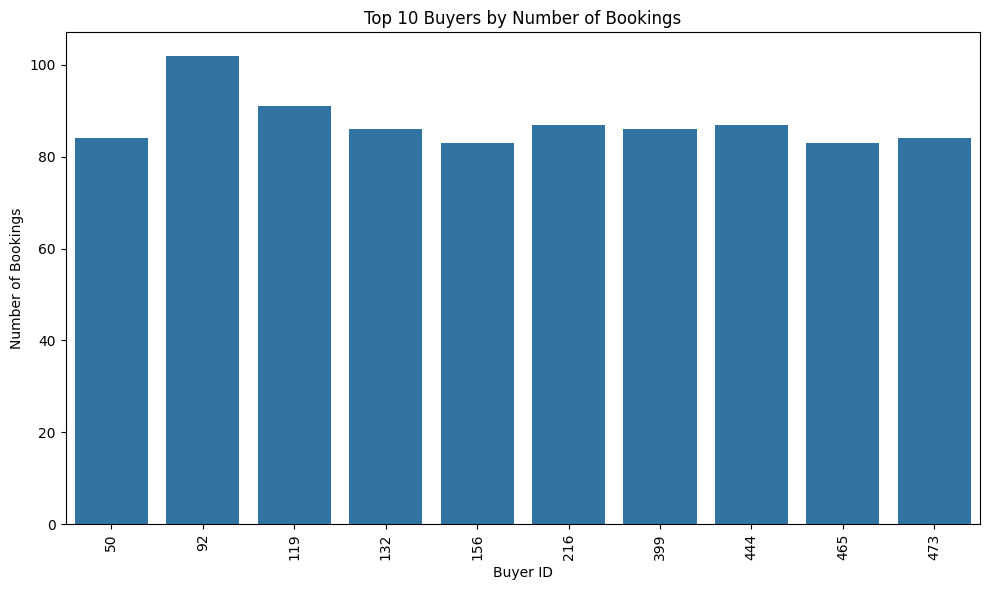

In [23]:
# Visualize top 10 buyers
plt.figure(figsize=(10, 6))
sns.barplot(x='buyer_id', y='bookings', data=buyer_performance.head(10))
plt.title('Top 10 Buyers by Number of Bookings')
plt.xlabel('Buyer ID')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [25]:
### Observation 2: Seasonal or Time-Based Trends ###
# Assuming 'booking_date' is in the dataset, convert to datetime
df['booking_date'] = pd.to_datetime(df['booking_date'])

In [26]:
# Extract month and visualize trends
df['month'] = df['booking_date'].dt.month
monthly_trends = df.groupby('month').size().reset_index(name='bookings')

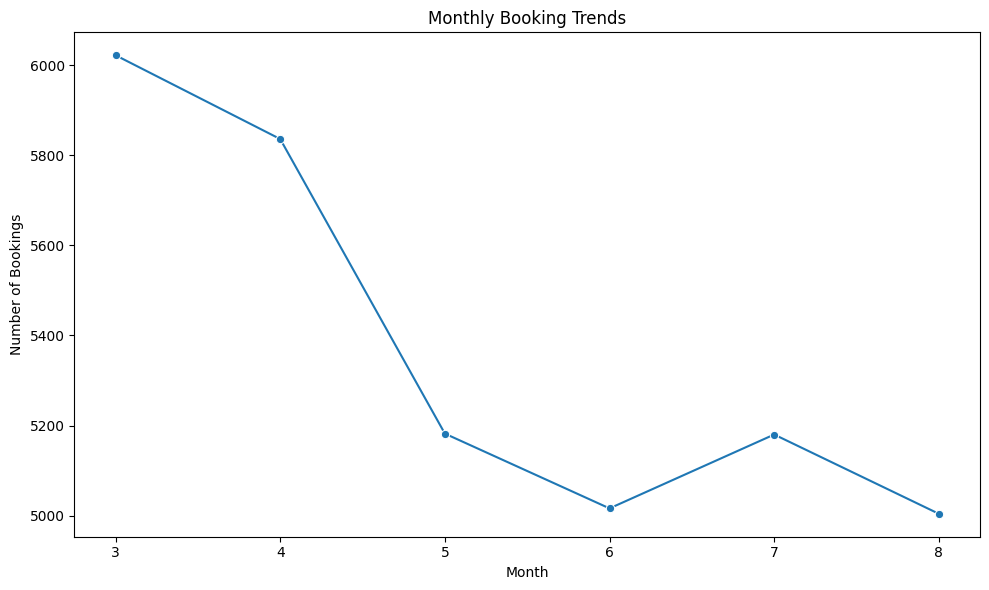

In [27]:

# Visualize booking trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='bookings', data=monthly_trends, marker='o')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

In [40]:
# Correlation Analysis
correlation = df[['costprice', 'markup', 'selling_price', 'refund_amount']].corr()

In [58]:
# Comparative Analysis of Suppliers
supplier_performance = df.groupby('supplier_id')[['selling_price', 'refund_amount']].agg(['sum', 'mean'])


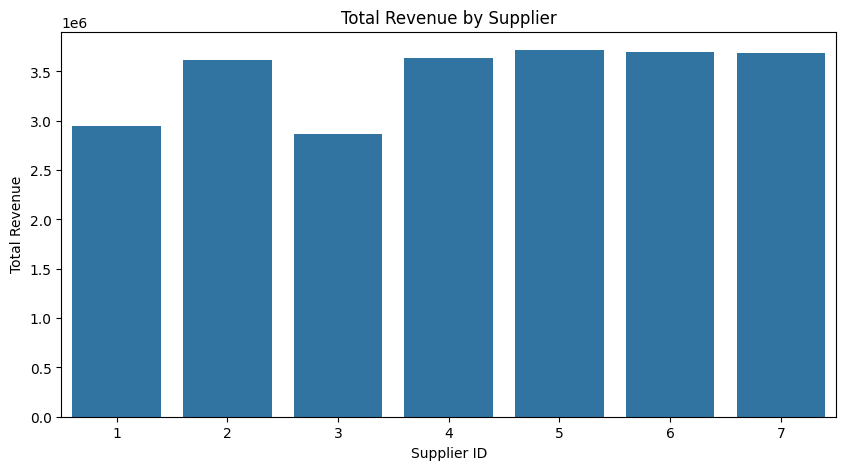

In [59]:
# Visualization of Supplier Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=supplier_performance.index, y=supplier_performance[('selling_price', 'sum')])
plt.title('Total Revenue by Supplier')
plt.xlabel('Supplier ID')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
### Short-term observations ###

In [49]:
# 1. Observation 1: Recent spike or drop in the number of bookings
df['booking_week'] = df['booking_date'].dt.to_period('W').apply(lambda r: r.start_time)  # Group by week
weekly_bookings = df['booking_week'].value_counts().sort_index()

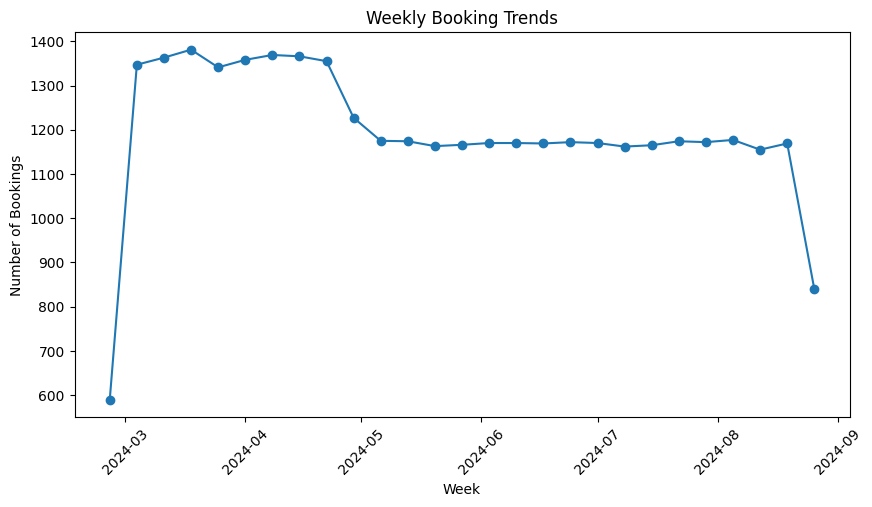

In [50]:
# Plot for weekly bookings trend
plt.figure(figsize=(10, 5))
plt.plot(weekly_bookings.index, weekly_bookings.values, marker='o')
plt.title('Weekly Booking Trends')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [51]:
# Short-term observation: Check the most recent change in booking numbers
last_two_weeks_bookings = weekly_bookings[-2:]
booking_change = last_two_weeks_bookings.diff().iloc[-1]
if booking_change > 0:
    print(f"Short-term observation 1: Bookings have increased by {booking_change} in the last week.")
else:
    print(f"Short-term observation 1: Bookings have decreased by {abs(booking_change)} in the last week.")

Short-term observation 1: Bookings have decreased by 329.0 in the last week.


In [52]:
# 2. Observation 2: Recent increase in total revenue (selling price)
weekly_revenue = df.groupby('booking_week')['selling_price'].sum()

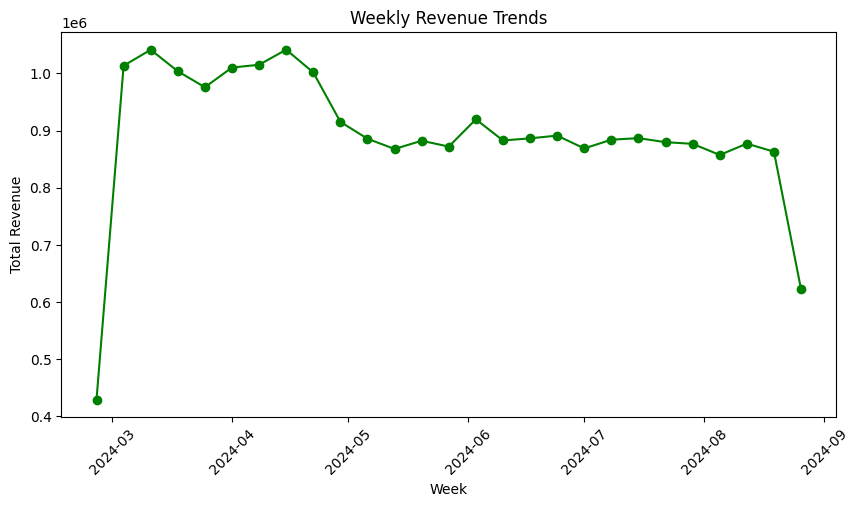

In [53]:
# Plot for weekly revenue trend
plt.figure(figsize=(10, 5))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', color='green')
plt.title('Weekly Revenue Trends')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Short-term observation: Check the most recent change in revenue
last_two_weeks_revenue = weekly_revenue[-2:]
revenue_change = last_two_weeks_revenue.diff().iloc[-1]
if revenue_change > 0:
    print(f"Short-term observation 2: Revenue has increased by {revenue_change:.2f} in the last week.")
else:
    print(f"Short-term observation 2: Revenue has decreased by {abs(revenue_change):.2f} in the last week.")

Short-term observation 2: Revenue has decreased by 240774.26 in the last week.


In [55]:
# 3. Observation 3: Recent trends in refunds (refund_amount)
weekly_refunds = df.groupby('booking_week')['refund_amount'].sum()

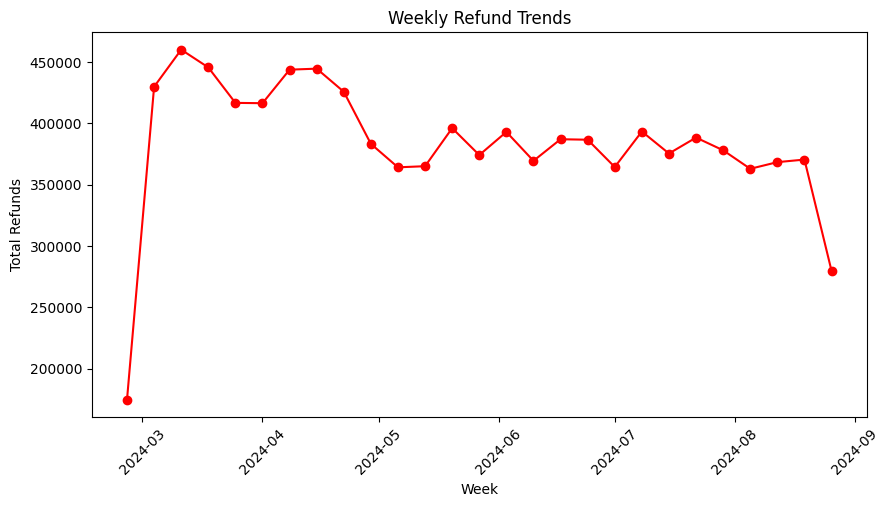

In [56]:
# Plot for weekly refund trend
plt.figure(figsize=(10, 5))
plt.plot(weekly_refunds.index, weekly_refunds.values, marker='o', color='red')
plt.title('Weekly Refund Trends')
plt.xlabel('Week')
plt.ylabel('Total Refunds')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Short-term observation: Check the most recent change in refund amount
last_two_weeks_refunds = weekly_refunds[-2:]
refund_change = last_two_weeks_refunds.diff().iloc[-1]
if refund_change > 0:
    print(f"Short-term observation 3: Refunds have increased by {refund_change:.2f} in the last week.")
else:
    print(f"Short-term observation 3: Refunds have decreased by {abs(refund_change):.2f} in the last week.")

Short-term observation 3: Refunds have decreased by 90724.60 in the last week.


In [ ]:
### Long-term observations ###

In [61]:
# Extract Year-Month for long-term analysis
df['year_month'] = df['booking_date'].dt.to_period('M')

In [62]:
# 1. Observation 1: Long-term trend in revenue (selling price) over time
monthly_revenue = df.groupby('year_month')['selling_price'].sum()

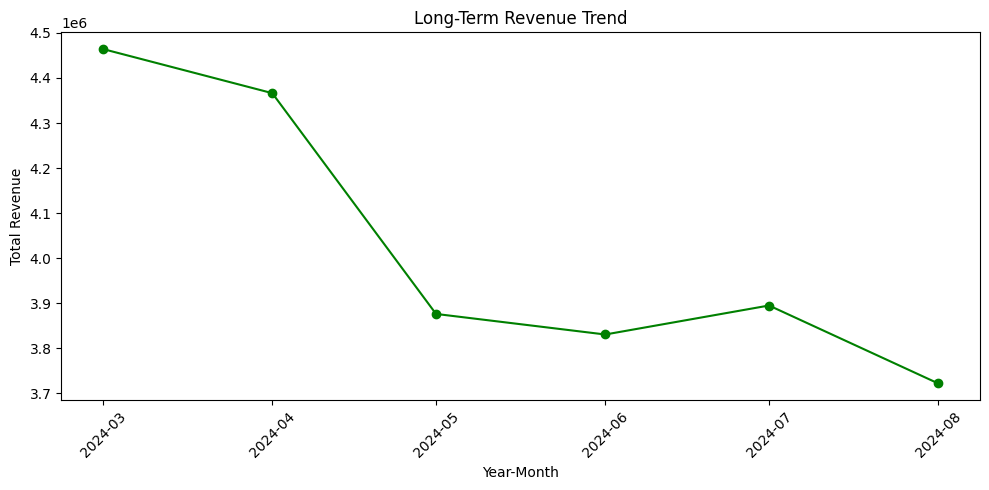

In [63]:
# Plotting the long-term revenue trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index.to_timestamp(), monthly_revenue.values, marker='o', color='green')
plt.title('Long-Term Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Long-term observation 1
print("Long-term observation 1: The total revenue has shown the following trend over the months:")


Long-term observation 1: The total revenue has shown the following trend over the months:


In [65]:
# 2. Observation 2: Long-term trend in number of bookings over time
monthly_bookings = df.groupby('year_month')['buyer_id'].count()

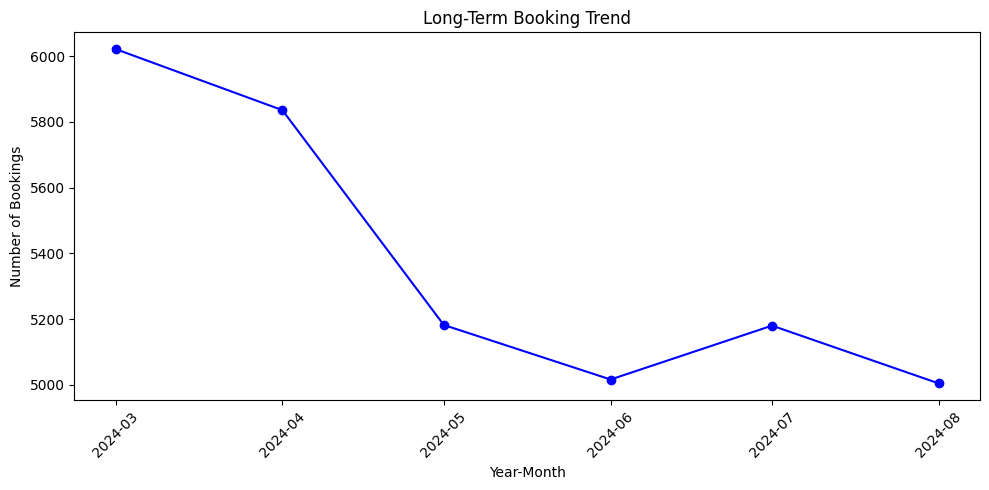

In [66]:
# Plotting the long-term booking trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_bookings.index.to_timestamp(), monthly_bookings.values, marker='o', color='blue')
plt.title('Long-Term Booking Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Long-term observation 2
print("Long-term observation 2: The number of bookings has shown the following trend over the months:")


Long-term observation 2: The number of bookings has shown the following trend over the months:


In [68]:
# 3. Observation 3: Long-term trend in refund amounts over time
monthly_refunds = df.groupby('year_month')['refund_amount'].sum()

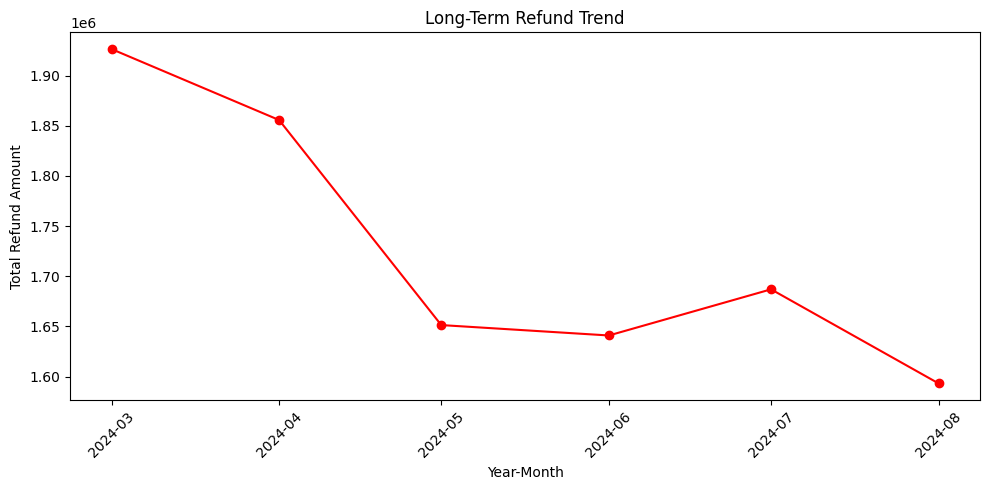

In [69]:
# Plotting the long-term refund trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_refunds.index.to_timestamp(), monthly_refunds.values, marker='o', color='red')
plt.title('Long-Term Refund Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Refund Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
# Long-term observation 3
print("Long-term observation 3: The total refund amount has shown the following trend over the months:")

Long-term observation 3: The total refund amount has shown the following trend over the months:
